# Module 1.5 - NOx formation

$NO_x$ are nitrogen oxides present in the combustion products. Usually, we mean $NO$ and $NO_2$ and the $NO_x$ concentration is the sum $NO_x = NO+NO_2$. $NO_x$ causes photochemical smog and ozone and also acid rain. It's emissions are strictly regulated. Formation of nitrogen oxides is due to 4 processes: thermal NO formation, prompt NO formation, NO by nitrous oxide ($N_2O$) and fuel bound NO. In this module we will look at the formation of $NO_x$ and it's presentation in different units, and we will look at the influence of the operating conditions on the $NO_x$ emissions.

In [1]:
# use notebook for jupyter notebook
#%matplotlib notebook
# use inline for jupyter labs
%matplotlib inline
import sys
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

Recall the chemical equilibrium simulation with detailed chemistry for methane-air combustion:

In [2]:
"""
Chemical equilibrium simulation
"""

gas = ct.Solution('gri30.cti')

# create an array for equivalence ratio from 0.5 - 2.0 with 100 points
phi = np.linspace(0.5, 1.5, 20)
T_1step = np.zeros(phi.shape)

# only a gaseous state, we add time 'phi' as an extra property
states = ct.SolutionArray(gas, extra=['phi'])

for i in range(len(phi)):
    # set the temperature and pressure
    gas.TP = 300, ct.one_atm
    gas.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    # equilibrium computation, with specific enthalpy H and pressure P being constant
    gas.equilibrate('HP')
    states.append(gas.state, phi=phi[i])

We are interested in the nitrogen oxides. The main components in a methane-air flame are NO, NO2 and N2O

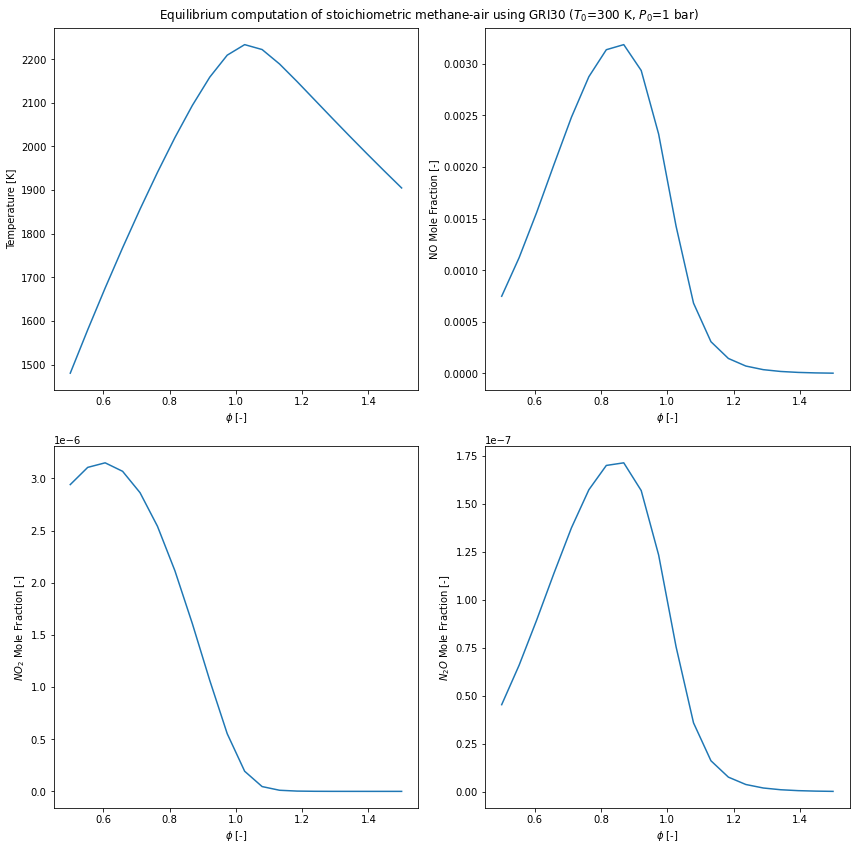

In [3]:
# globally change the size of all plots
plt.rcParams['figure.figsize'] = [12, 12]

plt.clf()
plt.suptitle('Equilibrium computation of stoichiometric methane-air using GRI30 ($T_0$=300 K, $P_0$=1 bar)')

# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.plot(states.phi, states.T)
plt.xlabel('$\phi$ [-]')
plt.ylabel('Temperature [K]')
plt.subplot(2, 2, 2)
plt.plot(states.phi, states.X[:,gas.species_index('NO')])
plt.xlabel('$\phi$ [-]')
plt.ylabel('NO Mole Fraction [-]')
plt.subplot(2, 2, 3)
plt.plot(states.phi, states.X[:,gas.species_index('NO2')])
plt.xlabel('$\phi$ [-]')
plt.ylabel('$NO_2$ Mole Fraction [-]')
plt.subplot(2, 2, 4)
plt.plot(states.phi, states.X[:,gas.species_index('N2O')])
plt.xlabel('$\phi$ [-]')
plt.ylabel('$N_2O$ Mole Fraction [-]')
plt.tight_layout()
plt.show()

in this figure above we see that for this case, NO is always the main contributor to the total mole fraction of nitrogen oxides. The maximum $NO$ concentration occurs at around $\phi=0.9$. In this case, we want to burn either very lean or very rich to avoid high $NO$ concentrations. Of course, there are limits to this as well, and the most obvious limits are determined by the flammability limits. 

We can also look at the formation of $NO$ in time using the constant-pressure reactor: 

In [4]:
"""
Constant-pressure, adiabatic kinetics simulation.
"""

# use the GRI 3.0 mechanism
gas = ct.Solution('gri30.xml')

# set the temperature and pressure
# remember that we have to use a large temperature because the mixture needs to ignite
gas.TP = 1000, ct.one_atm
gas.set_equivalence_ratio(1.0, 'CH4', 'O2:1, N2:3.76')
    
r = ct.IdealGasConstPressureReactor(gas)

# check what this is on the cantera documentation and verify that it is the correct model
reactorNetwork = ct.ReactorNet([r])
time = 0.0
# only a gaseous state, we add time 't' as an extra property
states = ct.SolutionArray(gas, extra=['t'])

print('%10s %10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','V [m^3]','u [J/kg]'))

for n in range(100):
    time += 2.e-2
    # we do a computation for 'time' seconds, starting from the previous solution. 
    # Cantera takes care of the 'internal' timesteps to ensure accuracy
    reactorNetwork.advance(time)
    states.append(r.thermo.state, t=time)
    print('%10.3e %10.3f %10.3f %10.3f %14.6e' % (reactorNetwork.time, r.T, r.thermo.P, r.volume, r.thermo.u))

     t [s]      T [K]     P [Pa]    V [m^3]       u [J/kg]
 2.000e-02   1000.004 101325.000      1.000   2.870639e+05
 4.000e-02   1000.022 101325.000      1.000   2.870587e+05
 6.000e-02   1000.043 101325.000      1.000   2.870524e+05
 8.000e-02   1000.066 101325.000      1.000   2.870454e+05
 1.000e-01   1000.092 101325.000      1.000   2.870378e+05
 1.200e-01   1000.119 101325.000      1.000   2.870296e+05
 1.400e-01   1000.149 101325.000      1.000   2.870206e+05
 1.600e-01   1000.182 101325.000      1.000   2.870109e+05
 1.800e-01   1000.217 101325.000      1.000   2.870003e+05
 2.000e-01   1000.255 101325.000      1.000   2.869890e+05
 2.200e-01   1000.296 101325.000      1.000   2.869767e+05
 2.400e-01   1000.340 101325.000      1.000   2.869634e+05
 2.600e-01   1000.387 101325.000      1.000   2.869491e+05
 2.800e-01   1000.439 101325.000      1.000   2.869336e+05
 3.000e-01   1000.494 101325.000      1.000   2.869170e+05
 3.200e-01   1000.554 101325.000      1.001   2.868990e+

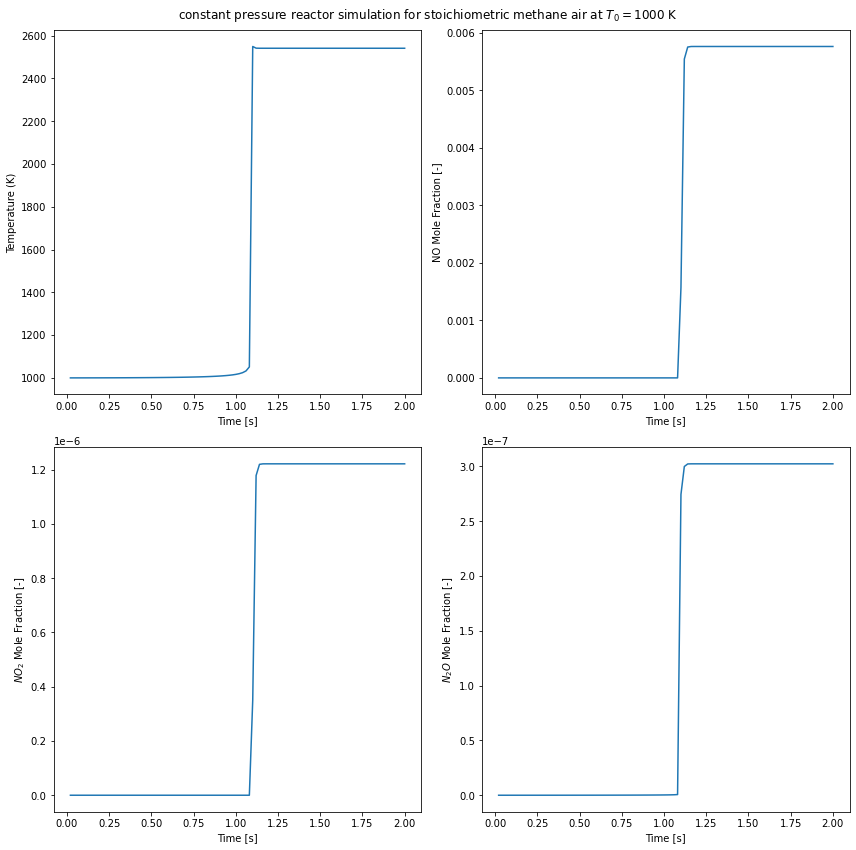

In [5]:
# globally change the size of all plots
plt.rcParams['figure.figsize'] = [12, 12]

plt.clf()
plt.suptitle('constant pressure reactor simulation for stoichiometric methane air at $T_0=1000$ K')
# 2 x 2 plot, start counting at 1 
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time [s]')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:,gas.species_index('NO')])
plt.xlabel('Time [s]')
plt.ylabel('NO Mole Fraction [-]')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:,gas.species_index('NO2')])
plt.xlabel('Time [s]')
plt.ylabel('$NO_2$ Mole Fraction [-]')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:,gas.species_index('N2O')])
plt.xlabel('Time [s]')
plt.ylabel('$N_2O$ Mole Fraction [-]')
plt.tight_layout()
plt.show()

In the figure above we see that due to the large initial temperature to get the mixture ignited, we end up with a high final temperature as well. The impact on $NO$ is large: the mole fraction is twice as large as for the chemical equilibrium simulation. 

For the reactor problem, we can additionally perform a sensitivity analysis. We can pick an observable, like flame speed, temperature or the NO concentration. We can then analyze the chemical reaction process and determine which of the chemical reactions has the largest impact on the observable. We will now do a sensitivity analysis with $NO$ as the observable. We will find the reaction that has the most impact on the formation of $NO$. We determine this sensitivity at the end of our computation, but the sensitivity can be (is!) time-dependent and different reactions can become more or less important during the combustion process.

In [6]:
# this section is based on the cantera example:
# https://cantera.org/examples/python/reactors/sensitivity1.py.html
# running this example might take 1-2 minutes

gas = ct.Solution('gri30.xml')

gas.TP = 1500, ct.one_atm
gas.set_equivalence_ratio(1.0, 'CH4', 'O2:1, N2:3.76')

r = ct.IdealGasConstPressureReactor(gas) 
sim = ct.ReactorNet([r]) 

# number of chemical reactions
n = 325 
# we solve the sensitivities (adjoint equations) of all reactions
for i in range(n):
    r.add_sensitivity_reaction(i)

    
timesteps = np.arange(0, 3e-3, 5e-6)
states = ct.SolutionArray(gas, extra =['t','s_no','s_no2']) 

# we find the reaction that has the most impact on the observable
most_important_reaction = 0
sensitivity_most_important_reaction = 0
index_most_important_reaction = -1

for t in timesteps: 
    sim.advance(t) 
    # we keep track of the sensitivity in time of one reaction, to show the time dependence. 
    # We pick reaction 177 for reasons that will become clear in a minute
    s2 = sim.sensitivity('NO', 177) # sensitivity of NO to reaction 177
    s3 = sim.sensitivity('NO2', 177) # sensitivity of NO2 to reaction 177
    states.append(r.thermo.state,t=t,s_no=s2,s_no2=s3)
    
# loop over all reactions and get the reaction that has the most impact on the observable
# we do this after the final timetep. We can also determine the sensitivity of all reactions during combustion
for j in range(n): 
    # sensitivity of the observable to reaction j
    s = sim.sensitivity('NO',j)

    if np.abs(s)>= np.abs(sensitivity_most_important_reaction):       
        sensitivity_most_important_reaction = s
        index_most_important_reaction = j
        
most_important_reaction = gas.reaction(index_most_important_reaction).equation 
print("NO is most sensitive to the reaction ",most_important_reaction)
print("This reaction appears in the mechanism as reaction number ",index_most_important_reaction)

NO is most sensitive to the reaction  N + NO <=> N2 + O
This reaction appears in the mechanism as reaction number  177


Our sensitivity analysis has shown that the production of NO is most sensitive to the reaction given above. The reaction mechnism has 325 reactions and this is reaction number 177. We recognize this as the main reaction in the thermal NO mechanism, also known as the Zeldovich mechanism. We will therefore say that in this case, *NO is mainly produced by thermal NO*. Let's look at the concentrations in time.

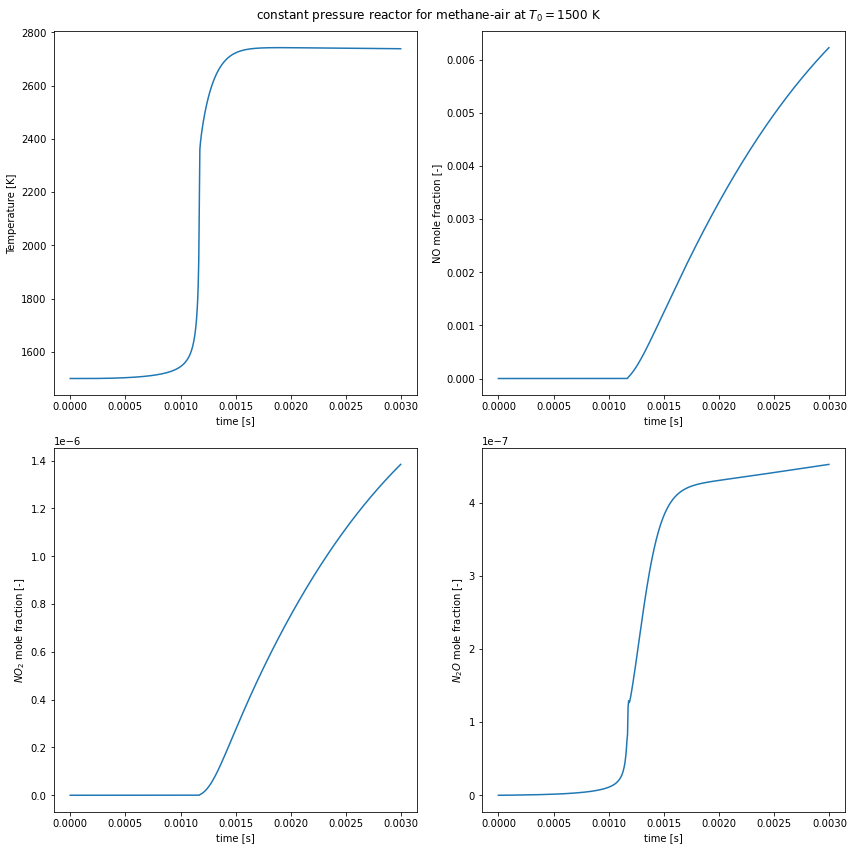

In [7]:
plt.figure(1)
plt.suptitle('constant pressure reactor for methane-air at $T_0=1500$ K')
plt.subplot(2,2,1)
plt.plot(states.t,states.T)
plt.xlabel('time [s]')
plt.ylabel('Temperature [K]')

plt.subplot(2,2,2)
plt.plot(states.t,states('NO').X)
plt.xlabel('time [s]')
plt.ylabel('NO mole fraction [-]')

plt.subplot(2,2,3)
plt.plot(states.t,states('NO2').X)
plt.xlabel('time [s]')
plt.ylabel('$NO_2$ mole fraction [-]')

plt.subplot(2,2,4)
plt.plot(states.t,states('N2O').X)
plt.xlabel('time [s]')
plt.ylabel('$N_2O$ mole fraction [-]')
plt.tight_layout()
plt.show()

In the figure above, we see that although the temperature has reached it's final value, the nitrogen oxides have not. These reactions are very slow. If we wait long enough, we will reach the equilibrium $NO_x$ concentrations. We see that $X_{NO}$ is very high! In Parts Per Million (ppm), the final concentration will certainly exceed $X_{NO}\cdot 10^6$ = 6000 ppm. Legal emission limits (for many applications) for $NO_x$ are usually < 100 ppm and sometimes even < 10 ppm. In many applications, combustion products are quickly cooled and the $NO_x$ production stops because the temperature is too low for the reaction to continue. The mole fractions $X_{NO2}$ and $X_{N_2O}$ are much lower than $X_{NO}$, so the main contributor to $NO_x$ is again $NO$. Note that legal emission limits are usually given in terms of dry air free (daf) ppm. This is the concentration in the mixture with air and water removed.

Let's see how the sensitivity of $NO$ and $NO_2$ for the thermal NO reaction changes in time.

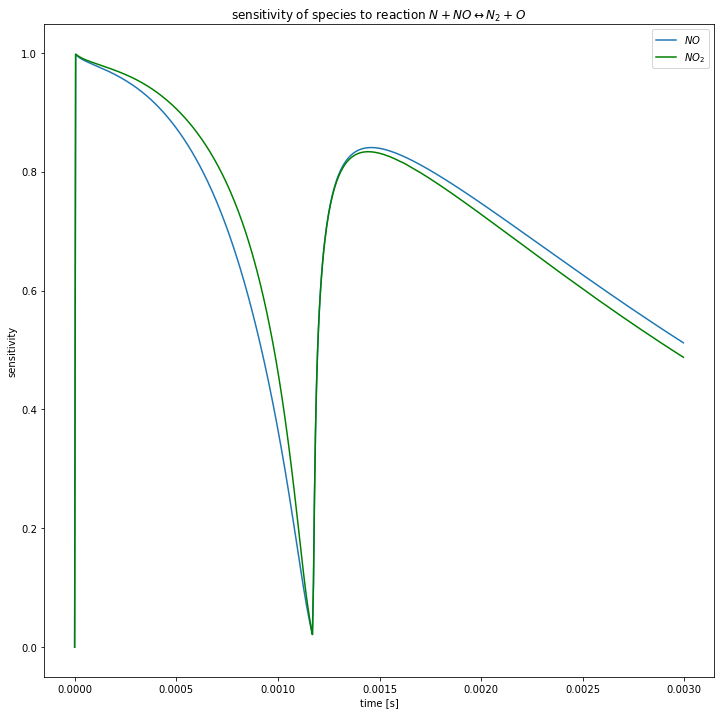

In [8]:
    plt.plot(states.t, states.s_no, '-',label='$NO$')
    plt.plot(states.t, states.s_no2, '-g',label='$NO_2$')
    plt.xlabel('time [s]')
    plt.ylabel('sensitivity')
    plt.title('sensitivity of species to reaction $N + NO \leftrightarrow N_2 + O$')
    plt.legend()
    plt.show()

We see that the sensitivity indeed depends on the exact state of the mixture. Close to ignition, the sensitivity drops, and other reactions will become more important for the production of NO. A sensitivity analysis offers a large number of possibilities for a deep analysis of what is going on in the chemistry, and it is becoming more and more a method to not only better understand the impact that certain reactions might have on emissions or flame speeds, but also a tool that can aid in the design of better and cleaner combustion devices.

# Assignment 1.5

- Plot the final equilibrium $NO_x = NO + NO_2 + N_2O$ concentration as function of equivalence ratio in parts per million (ppm), in dry air free (DAF) ppm and in mg/kWh. Show the formula to go from mole fraction to mg/kwh in the description. **[3 pts]**
- You have found that $NO$ is most sensitive to the reaction $N+NO \leftrightarrow N_2 + O$. Find the next 4 most important reactions for the formation of NO and print these top 5 reaction. Comment on methods to reduce NO. **[3 pts]**
- Change 3 operating conditions in the constant pressure reactior for methane-air that impact the $NO$ emissions and show the impact of each of these in 3 figures. Give a comment below each of the figures describing what you have changed. **[3 pts]**

As always, give a scientific description of your figures, explain what we see and why. 